In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

**Questions begin with #5

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [9]:
gdp_df['Year'].nunique()

33

In [10]:
country_count = gdp_df.Country.value_counts().to_frame().reset_index()
country_count


,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [11]:
len(country_count[country_count['count'] == 33])

202

In [12]:
country_count.loc[country_count['count'] < 33]

,Country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [14]:
twentytwenty_gdp_df = gdp_df.loc[gdp_df.Year == 2020]
twentytwenty_gdp_df

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


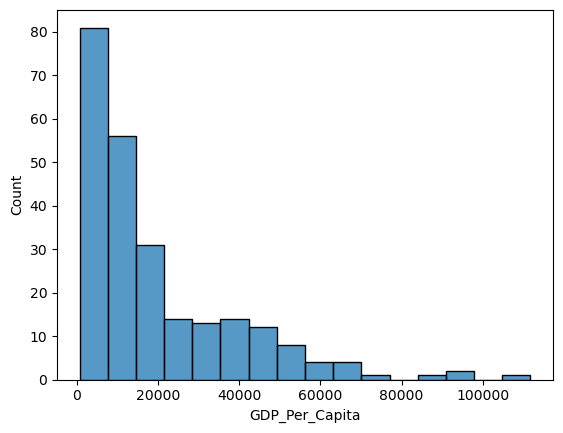

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
  

sns.histplot(twentytwenty_gdp_df.GDP_Per_Capita)
plt.show()

  




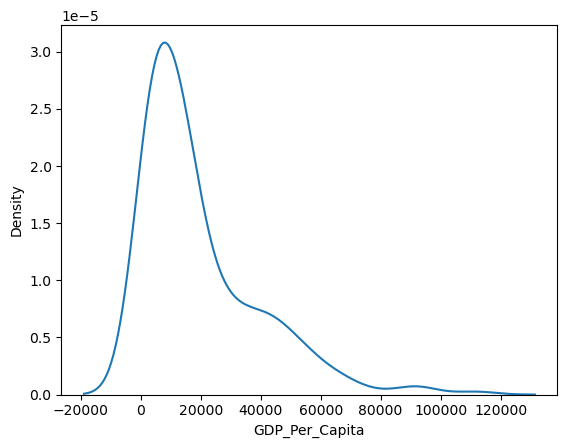

In [16]:
sns.kdeplot(twentytwenty_gdp_df.GDP_Per_Capita)
plt.show()

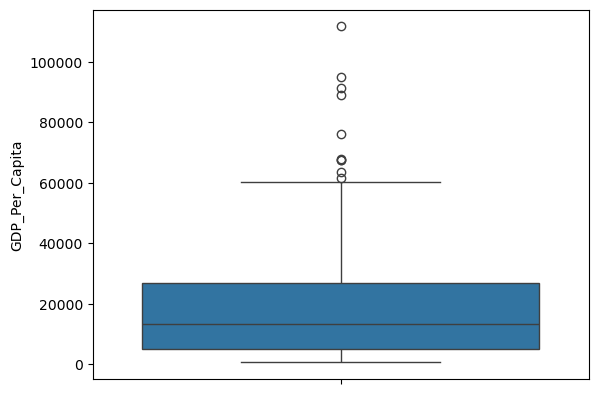

In [17]:
sns.boxplot(twentytwenty_gdp_df.GDP_Per_Capita)
plt.show()

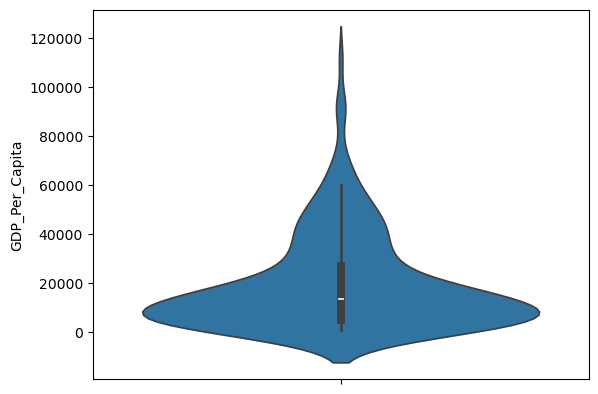

In [18]:
sns.violinplot(twentytwenty_gdp_df['GDP_Per_Capita'])
plt.show()

9. What was the median GDP per capita value in 2020?

In [20]:
twentytwenty_gdp_df['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [22]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades


,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

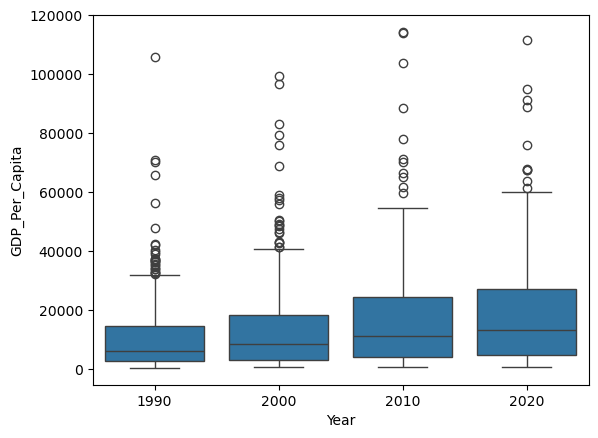

In [23]:
sns.boxplot(x= gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

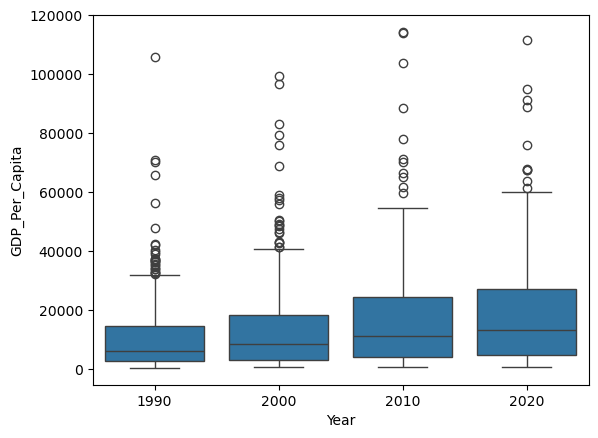

In [24]:
sns.boxplot(x= gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

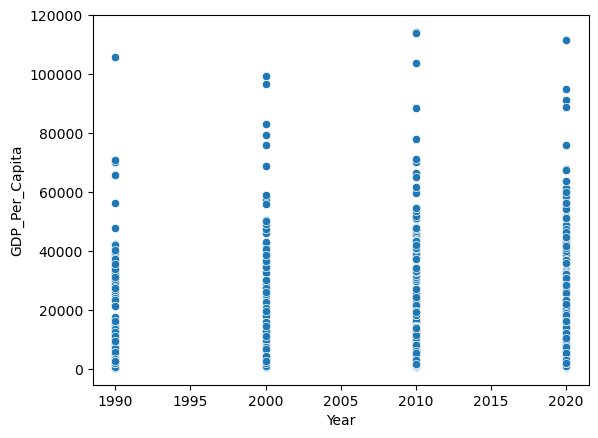

In [25]:
sns.scatterplot(x= gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

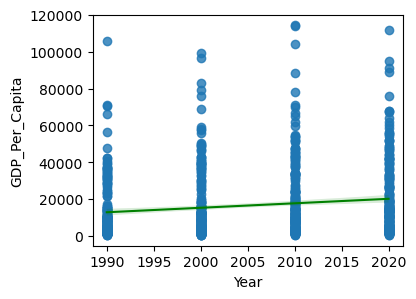

In [26]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "green", "linewidth": 1.5},
    ax=ax)
plt.show()

GDP has been growing, but most countries are below $20,000.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [29]:
q_11 = gdp_df.loc[gdp_df['GDP_Per_Capita'] > 100000]
q_11.loc[q_11['Year'] == q_11['Year'].min()]

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [33]:
q_12 = gdp_df.loc[gdp_df['Year'] == 2020]
q_12.loc[q_12['GDP_Per_Capita'] == q_12['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [35]:
lux_gdp=gdp_df.loc[gdp_df['Country'] == 'Luxembourg']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

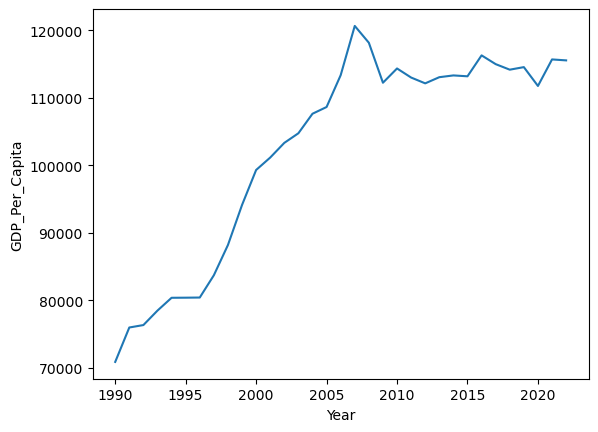

In [37]:
sns.lineplot(y=lux_gdp['GDP_Per_Capita'],x=lux_gdp['Year'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [39]:
q_13 = gdp_df.loc[gdp_df['Year'] == 2020]
q_13.loc[q_13['GDP_Per_Capita'] == q_13['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [41]:
bur_gdp=gdp_df.loc[gdp_df['Country'] == 'Burundi']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

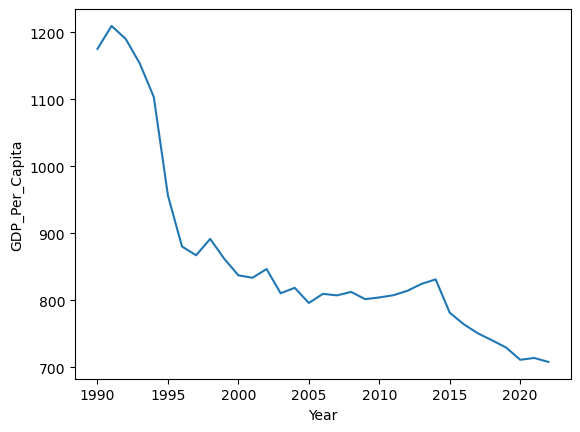

In [43]:
sns.lineplot(y=bur_gdp['GDP_Per_Capita'],x=bur_gdp['Year'])

In [45]:
gdp_1990 = gdp_df.loc[gdp_df.Year == 1990]
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_1990_and_2020 = pd.merge(gdp_1990, gdp_2020, on = 'Country', how = 'inner')
pd.Series(gdp_1990_and_2020.GDP_Per_Capita_x > gdp_1990_and_2020.GDP_Per_Capita_y).sum()

19

It is true in general that coutries had a higher GDP per capita in 2020 than in 1990. Only 19 of 207 countries had a GDP higher in 1990

In [50]:
gdp_1990_and_2020.loc[gdp_1990_and_2020.GDP_Per_Capita_x > gdp_1990_and_2020.GDP_Per_Capita_y]

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [53]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [59]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [61]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [63]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [65]:
internet_df = internet_df.drop(columns=['Value Footnotes'])


In [67]:
internet_df = internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?
    

In [69]:
internet_df['Year'].value_counts().sort_index(ascending=True)

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: int64

1990 had high count due to first year, then dropped to 39 and steadily increased until 2002. Stayed steady until 2017 and started declining after. Looks like the dataset ends in 2023.

17. What is the first year to have a non-zero internet users percentage value?

In [76]:
internet_df.loc[(internet_df['Internet_Users_Pct'] > 0) & (internet_df['Year'] == internet_df['Year'].min())]

,Country,Year,Internet_Users_Pct
306,Australia,1990,0.585095
339,Austria,1990,0.130369
543,Belgium,1990,0.001007
1010,Canada,1990,0.361000
1570,Denmark,1990,0.097277
2001,Finland,1990,0.401088
2034,France,1990,0.052778
2192,Germany,1990,0.125892
2796,Israel,1990,0.110774
2829,Italy,1990,0.017545


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [88]:
two_year=internet_df.loc[internet_df['Year'].isin([2000,2014])]
two_year

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

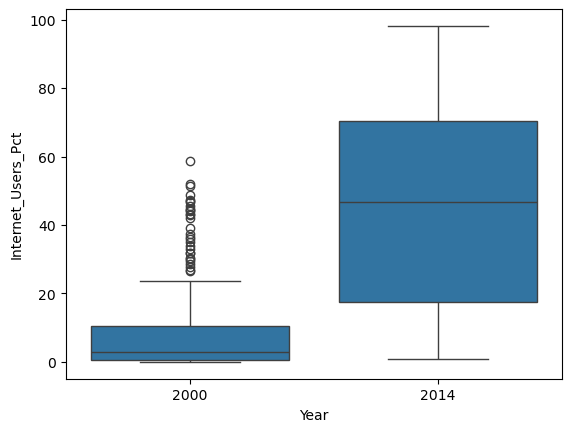

In [91]:
sns.boxplot(x=two_year['Year'], y=two_year['Internet_Users_Pct'])

Substantially more internet users in 2014

19. For how many countries was the percentage of internet users below 5% in 2014?

In [94]:
((internet_df['Year'] == 2014)&(internet_df['Internet_Users_Pct'] < 5)).sum()

10

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [96]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                                how = 'outer', on = ['Country', 'Year'])

gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [108]:
gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014].nlargest(3, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


In [110]:
countries = ['Iceland','Falkland (Malvinas) Islands','Bermuda']

In [114]:
top_3=gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(countries)]

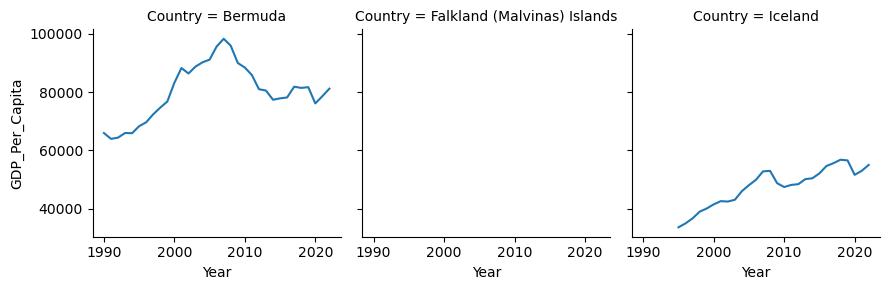

In [116]:
g = sns.FacetGrid(top_3, col="Country")
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [122]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

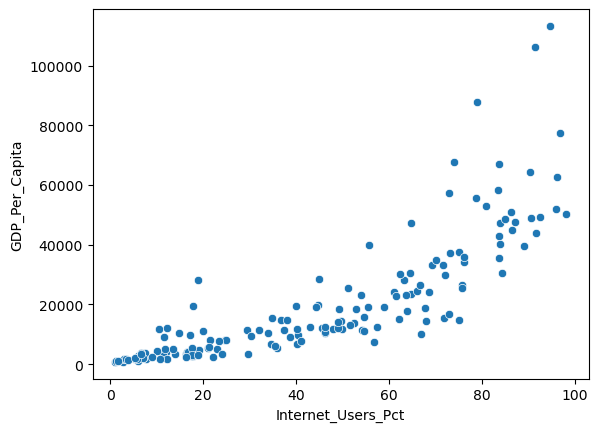

In [124]:
sns.scatterplot(x=gdp_and_internet_use_2014['Internet_Users_Pct'], y=gdp_and_internet_use_2014['GDP_Per_Capita'])

There is a positive correlation between GDP Per Capital and Internet Users Percentage

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [135]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q = 3, labels = ['Low', 'Medium', 'High'])
gdp_and_internet_use_2014

C:\Users\graft\AppData\Local\Temp\ipykernel_320336\1860608778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q = 3, labels = ['Low', 'Medium', 'High'])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
14,Afghanistan,2014,2144.449634,7.0000,Low
46,Africa Eastern and Southern,2014,3642.875373,NaN,Low
79,Africa Western and Central,2014,4146.994622,NaN,Low
112,Albania,2014,11586.817446,54.3000,Medium
145,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN,Low
9011,World,2014,15120.730322,NaN,Medium
9039,Yemen,2014,NaN,22.5500,NaN
9070,Zambia,2014,3375.941270,6.5000,Low


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [172]:
median_internet_users = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()
median_internet_users

C:\Users\graft\AppData\Local\Temp\ipykernel_320336\2577651128.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_internet_users = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64